In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [3]:

# Load the dataset
boston = load_diabetes()
X = boston.data
y = boston.target


In [4]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [7]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [8]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [14]:
from keras.layers import Dropout

# Create and train a neural network for regression
nn_model = Sequential()
nn_model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(128, activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(1))
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
nn_model.fit(X_train, y_train, epochs=50, batch_size=10)


Epoch 1/50
36/36 [==============================] - 5s 10ms/step - loss: 29093.9824 - mae: 151.8645
Epoch 2/50
36/36 [==============================] - 0s 10ms/step - loss: 26586.1953 - mae: 143.6630
Epoch 3/50
36/36 [==============================] - 1s 15ms/step - loss: 20005.6309 - mae: 120.9477
Epoch 4/50
36/36 [==============================] - 0s 11ms/step - loss: 10718.6621 - mae: 81.6011
Epoch 5/50
36/36 [==============================] - 0s 9ms/step - loss: 6080.6826 - mae: 59.9873
Epoch 6/50
36/36 [==============================] - 0s 5ms/step - loss: 5075.4849 - mae: 55.4478
Epoch 7/50
36/36 [==============================] - 0s 5ms/step - loss: 4788.1953 - mae: 54.2538
Epoch 8/50
36/36 [==============================] - 0s 6ms/step - loss: 4145.2319 - mae: 48.6820
Epoch 9/50
36/36 [==============================] - 0s 5ms/step - loss: 4422.8384 - mae: 53.2367
Epoch 10/50
36/36 [==============================] - 0s 4ms/step - loss: 4250.0928 - mae: 50.5868
Epoch 11/50
36/36 

In [12]:
lr_y_pred = lr_model.predict(X_test)
dt_y_pred = dt_model.predict(X_test)
rf_y_pred = rf_model.predict(X_test)
nn_y_pred = nn_model.predict(X_test).flatten()

3/3 [==============================] - 0s 3ms/step


In [13]:
models = [('Linear Regression', lr_y_pred), ('Decision Tree', dt_y_pred),
          ('Random Forest', rf_y_pred), ('Neural Network', nn_y_pred)]
for name, y_pred in models:
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{name} Test MSE Score: {mse}')
    print(f'{name} Test MAE Score: {mae}')

Linear Regression Test MSE Score: 2900.193628493482
Linear Regression Test MAE Score: 42.79409467959994
Decision Tree Test MSE Score: 4861.101123595506
Decision Tree Test MAE Score: 53.52808988764045
Random Forest Test MSE Score: 2953.938843820225
Random Forest Test MAE Score: 44.07359550561798
Neural Network Test MSE Score: 2763.2373187755984
Neural Network Test MAE Score: 42.20376432611701


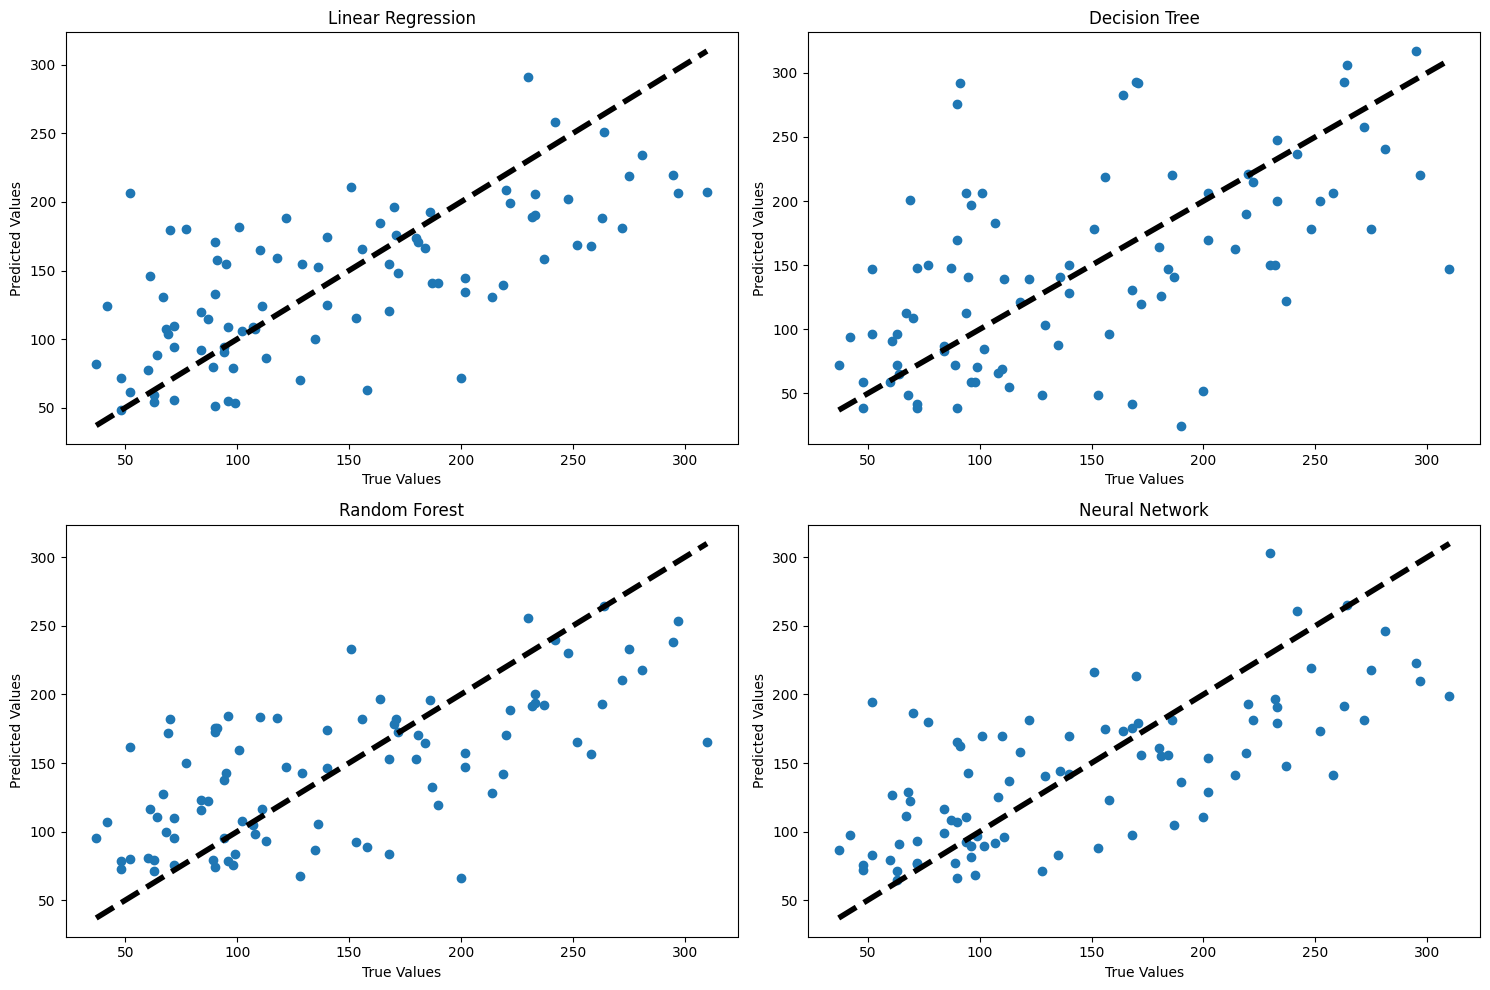

In [15]:
import matplotlib.pyplot as plt

# ... (your code to train the models)

# Plot the true values vs predicted values for each model
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

models = [('Linear Regression', lr_y_pred), ('Decision Tree', dt_y_pred),
          ('Random Forest', rf_y_pred), ('Neural Network', nn_y_pred)]
for ax, (name, y_pred) in zip(axs.flatten(), models):
    ax.scatter(y_test, y_pred)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(name)

plt.tight_layout()
plt.show()


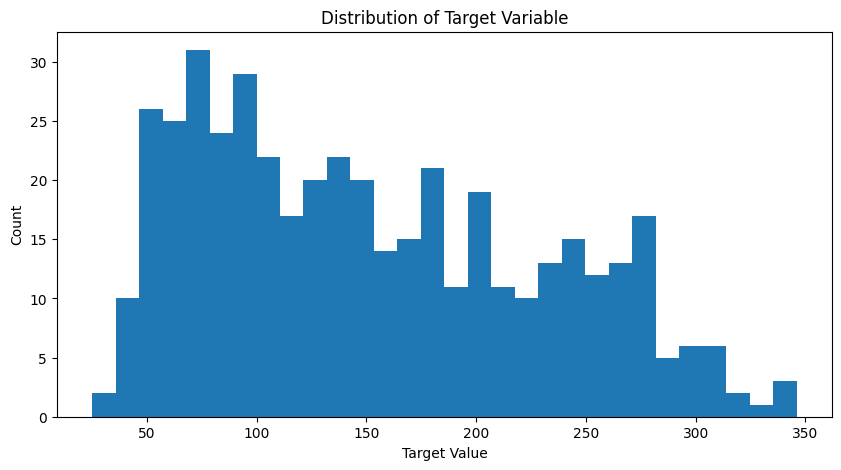

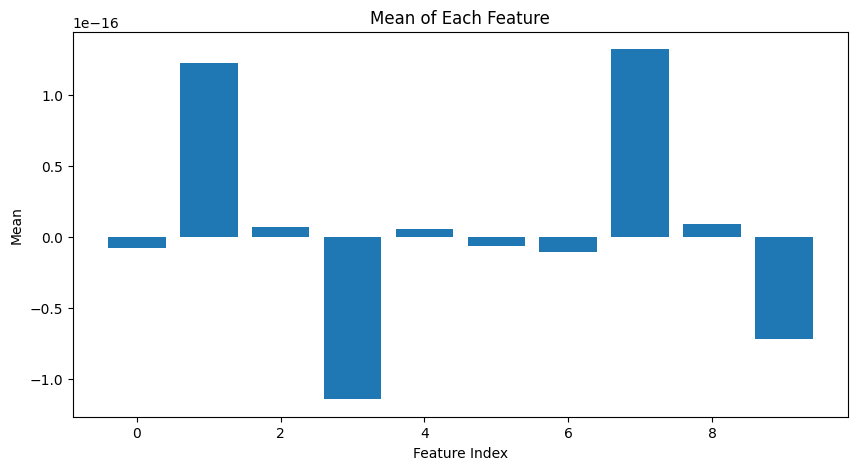

In [16]:
import matplotlib.pyplot as plt

# ... (your code to load the data)

# Plot the distribution of the target variable
plt.figure(figsize=(10, 5))
plt.hist(y, bins=30)
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

# Plot the mean of each feature
plt.figure(figsize=(10, 5))
plt.bar(range(X.shape[1]), np.mean(X, axis=0))
plt.xlabel('Feature Index')
plt.ylabel('Mean')
plt.title('Mean of Each Feature')
plt.show()

# ... (your code to train the models and plot the results)
